In [1]:
#import os
import pandas as pd
import numpy as np
import time
from PIL import Image

In [2]:
#import Spark
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop3.2/')

### Load S3 Data

In [3]:
import boto3

In [4]:
# Get resources stored in AWS S3 service
s3 = boto3.resource('s3')

In [5]:
# Print all existing buckets names (only one in this case)
for bucket in s3.buckets.all():
    print(bucket.name)

opc-fruits


In [6]:
# Print n first files present in the bucket 'ocproject-fruits'
fruits_bucket = s3.Bucket('opc-fruits')
for file in fruits_bucket.objects.limit(3):
    label = file.key.split('/')[-2]
    print(label, file.key)

apple_6 apple_6/r0_0.jpg
apple_6 apple_6/r1_74.jpg
apple_6 apple_6/r1_80.jpg


### Features selection - CNN

In [7]:
#pip install tensorflow --no-cache-dir

In [8]:
# import
import tensorflow as tf

2022-06-10 08:50:51.829275: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-10 08:50:51.829323: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
from tensorflow import keras

In [10]:
# featurizer
from keras.applications.vgg16 import VGG16, preprocess_input

In [11]:
VGG_extractor = VGG16(
                weights=None,
                include_top=False,
                input_shape=(100, 100, 3))

2022-06-10 08:50:53.504314: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-10 08:50:53.504352: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-10 08:50:53.504376: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-33-107): /proc/driver/nvidia/version does not exist
2022-06-10 08:50:53.504575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
VGG_extractor.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [13]:
import matplotlib.pyplot as plt

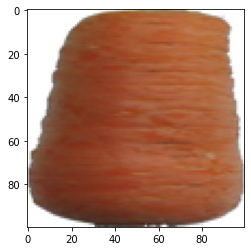

In [14]:
# get the 10 first cnn_features
start = time.perf_counter()
list_path_img = []
for file in fruits_bucket.objects.limit(10):
    obj = fruits_bucket.Object(file.key)
    label = file.key.split('/')[-2]
    response = obj.get()
    file_stream = response['Body']
    img = Image.open(file_stream)
    img2 = img.resize((100, 100))
    img_array = np.array(img2)
    plt.imshow(img2)

In [15]:
#img_array

In [16]:
#img = s3.Bucket('opc-fruits').download_file('apple_6/r0_0.jpg', 'r0_0.jpg')

In [17]:
#display(img)

In [18]:
# get the 10 first cnn_features
start = time.perf_counter()
list_path_img = []
for file in fruits_bucket.objects.limit(10):
    obj = fruits_bucket.Object(file.key)
    label = file.key.split('/')[-2]
    response = obj.get()
    file_stream = response['Body']
    img = Image.open(file_stream)  
    img2 = img.resize((100, 100))
    img_array = np.array(img2)
    list_img = [img_array]
    test = np.array(list_img)
    # preprocess input
    prep_tensor = preprocess_input(test)
    features = VGG_extractor.predict(prep_tensor).flatten().tolist()
    # Store file key and features
    list_path_img.append((file.key, label, features))
stop = time.perf_counter()
print(f'process, elapsed time: {stop - start:0.2f}s')

1/1 [==============================] - 0s 70ms/step
process, elapsed time: 1.51s


In [19]:
features[0]

0.0

In [20]:
list_path_img[0]

('apple_6/r0_0.jpg',
 'apple_6',
 [0.008141303434967995,
  0.1250966340303421,
  0.02768537402153015,
  0.08117370307445526,
  0.22745464742183685,
  0.17243583500385284,
  0.12241242825984955,
  0.2773514986038208,
  0.09983912110328674,
  0.18885518610477448,
  0.2694356441497803,
  0.0,
  0.18273787200450897,
  0.34805968403816223,
  0.0,
  0.0,
  0.17686288058757782,
  0.0,
  0.2052726000547409,
  0.03238070756196976,
  0.09242676943540573,
  0.011857457458972931,
  0.0,
  0.0,
  0.061773963272571564,
  0.11091959476470947,
  0.07523376494646072,
  0.11439938843250275,
  0.0,
  0.10957605391740799,
  0.0,
  0.0,
  0.018725614994764328,
  0.14580312371253967,
  0.12516997754573822,
  0.31876450777053833,
  0.40186887979507446,
  0.13365979492664337,
  0.08152014017105103,
  0.2548159062862396,
  0.3471594452857971,
  0.0,
  0.0,
  0.052079446613788605,
  0.18273021280765533,
  0.16324317455291748,
  0.0,
  0.09073922038078308,
  0.12049519270658493,
  0.12382739782333374,
  0.0,
  0

### Spark

In [21]:
#import Spark
import pyspark

In [22]:
from pyspark import SparkContext

In [23]:
pyspark.__version__

'3.2.1'

In [24]:
# context & session
from pyspark.sql import SparkSession

In [25]:
# data handling
from pyspark.sql.functions import input_file_name, split
from pyspark.sql.functions import pandas_udf
from pyspark.sql.functions import udf
from pyspark.sql.types import *

In [26]:
# ml tasks
from pyspark.ml.image import ImageSchema
from pyspark.ml.feature import PCA, StandardScaler

In [27]:
#pip install sagemaker_pyspark --no-cache-dir

In [28]:
#spark = SparkSession.builder.master("local[*]").config("spark.driver.memory", "15g").appName('Fruits-App').getOrCreate()      

In [29]:
spark = SparkSession\
.builder\
.master("local[*]")\
.config("spark.executor.instances", "4")\
.config("spark.executor.memory", "5g")\
.config("spark.driver.memory", "10g")\
.config("spark.executor.memoryOverhead", "10g")\
.appName("Fruits-App")\
.enableHiveSupport().getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/06/10 08:50:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [30]:
spark

In [31]:
label

'carrot_1'

In [32]:
# Create spark dataframe from previous list of tuples
df_img = spark.createDataFrame(list_path_img, ['origin', 'label', 'cnn_features'])

In [33]:
# Show spark dataframe
df_img.show()

+-------------------+--------+--------------------+
|             origin|   label|        cnn_features|
+-------------------+--------+--------------------+
|   apple_6/r0_0.jpg| apple_6|[0.00814130343496...|
|  apple_6/r1_74.jpg| apple_6|[0.0, 0.121699184...|
|  apple_6/r1_80.jpg| apple_6|[0.0, 0.114573806...|
|  apple_6/r1_88.jpg| apple_6|[0.0, 0.128614261...|
|  apple_6/r1_96.jpg| apple_6|[0.0, 0.100222907...|
|  carrot_1/r0_0.jpg|carrot_1|[0.03942574188113...|
|carrot_1/r0_104.jpg|carrot_1|[0.0, 0.087470233...|
|carrot_1/r0_126.jpg|carrot_1|[0.0, 0.081147842...|
|carrot_1/r0_174.jpg|carrot_1|[0.0, 0.108103558...|
| carrot_1/r0_84.jpg|carrot_1|[0.0, 0.105385102...|
+-------------------+--------+--------------------+



In [34]:
df_img

DataFrame[origin: string, label: string, cnn_features: array<double>]

In [35]:
df_img.select('cnn_features')

DataFrame[cnn_features: array<double>]

In [36]:
df_img.printSchema()

root
 |-- origin: string (nullable = true)
 |-- label: string (nullable = true)
 |-- cnn_features: array (nullable = true)
 |    |-- element: double (containsNull = true)



### PCA

In [37]:
# transform
from pyspark.ml.linalg import Vectors, VectorUDT

In [38]:
# from Array to Vectors for PCA
array_to_vector_udf = udf(lambda l: Vectors.dense(l), VectorUDT())
df_img = df_img.withColumn('cnn_vectors', array_to_vector_udf('cnn_features'))

In [39]:
df_img = df_img.select('origin', 'label', 'cnn_vectors')

In [40]:
df_img

DataFrame[origin: string, label: string, cnn_vectors: vector]

In [41]:
standardizer = StandardScaler(inputCol="cnn_vectors", outputCol="scaledFeatures",
                              withStd=True, withMean=True)
model_std = standardizer.fit(df_img)
df_img = model_std.transform(df_img)

In [42]:
# reduce with PCA - k=20 arbitrary setting
pca = PCA(k=20, inputCol='scaledFeatures', outputCol='pca_vectors')

In [43]:
model = pca.fit(df_img)

22/06/10 08:51:11 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/06/10 08:51:11 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
22/06/10 08:51:15 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
22/06/10 08:51:15 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


In [44]:
# apply pca reduction
df_img = model.transform(df_img)

In [45]:
# from Vector to Array
vector_to_array_udf = udf(lambda v: v.toArray().tolist(), ArrayType(FloatType()))

In [46]:
df_img = df_img.withColumn('arrays', vector_to_array_udf('pca_vectors'))

In [47]:
df_img = df_img.select('origin', 'label', 'arrays')

In [48]:
df_img.show()

+-------------------+--------+--------------------+
|             origin|   label|              arrays|
+-------------------+--------+--------------------+
|   apple_6/r0_0.jpg| apple_6|[13.236404, -1.29...|
|  apple_6/r1_74.jpg| apple_6|[35.902733, -11.0...|
|  apple_6/r1_80.jpg| apple_6|[38.09407, -11.13...|
|  apple_6/r1_88.jpg| apple_6|[36.457848, -10.4...|
|  apple_6/r1_96.jpg| apple_6|[34.45589, -11.90...|
|  carrot_1/r0_0.jpg|carrot_1|[-46.332336, -57....|
|carrot_1/r0_104.jpg|carrot_1|[-18.334955, 48.5...|
|carrot_1/r0_126.jpg|carrot_1|[-9.153456, 65.77...|
|carrot_1/r0_174.jpg|carrot_1|[-43.99023, -4.91...|
| carrot_1/r0_84.jpg|carrot_1|[-40.335968, -6.2...|
+-------------------+--------+--------------------+



In [64]:
# Turn spark dataframe into pandas dataframe
results_df = df_img.toPandas()
results_df

,origin,label,arrays
0,apple_6/r0_0.jpg,apple_6,"[13.236404418945312, -1.2915613651275635, 18.6..."
1,apple_6/r1_74.jpg,apple_6,"[35.902732849121094, -11.083277702331543, 1.22..."
2,apple_6/r1_80.jpg,apple_6,"[38.09407043457031, -11.132407188415527, -1.89..."
3,apple_6/r1_88.jpg,apple_6,"[36.457847595214844, -10.458104133605957, -2.2..."
4,apple_6/r1_96.jpg,apple_6,"[34.45589065551758, -11.908247947692871, 0.672..."
5,carrot_1/r0_0.jpg,carrot_1,"[-46.33233642578125, -57.30274963378906, -42.4..."
6,carrot_1/r0_104.jpg,carrot_1,"[-18.3349552154541, 48.56758499145508, 0.51142..."
7,carrot_1/r0_126.jpg,carrot_1,"[-9.15345573425293, 65.7719955444336, -32.3058..."
8,carrot_1/r0_174.jpg,carrot_1,"[-43.990230560302734, -4.914563179016113, 21.8..."
9,carrot_1/r0_84.jpg,carrot_1,"[-40.335968017578125, -6.248668670654297, 35.9..."


In [68]:
spark.stop

<bound method SparkSession.stop of <pyspark.sql.session.SparkSession object at 0x7f1554920b20>>

In [91]:
results_df.to_csv("resultats.csv", index=False)

In [93]:
s3.meta.client.upload_file('resultats.csv', 'opc-fruits', 'results_df.csv')